In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


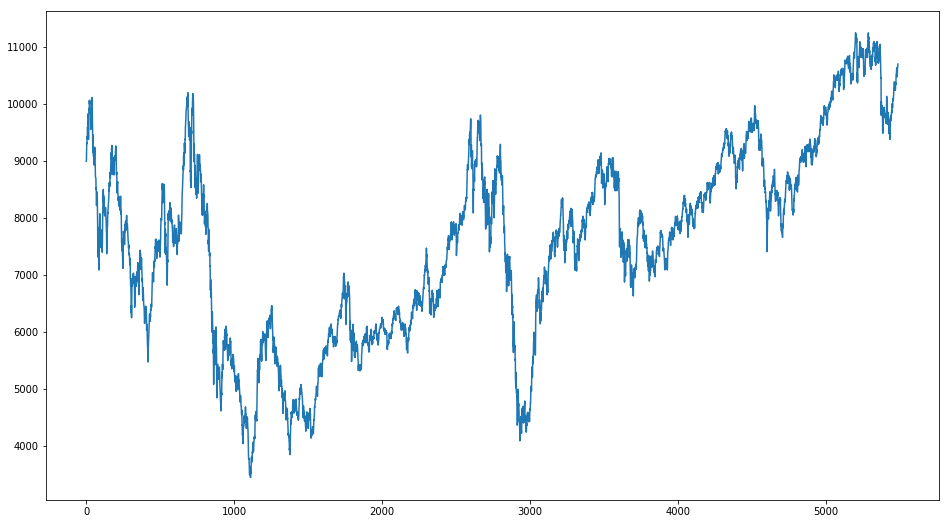

In [2]:
data = pd.read_csv("MarketData/TWII_Daily.csv") 
# data = pd.read_csv("MarketData/N225_Nikkei_Daily.csv") 
data = data.dropna()
plt.figure(figsize=(16,9))
plt.plot(data.Close)

In [3]:
max_slope = 1 + 60
max_vol = 1 + 60
for i in range(1, max_slope):
    data['r'+str(i)] = data.Close.pct_change(i)
for i in range(5, max_vol):
    data['vol'+str(i)] = data.Close.rolling(i).std()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,r1,r2,r3,...,vol51,vol52,vol53,vol54,vol55,vol56,vol57,vol58,vol59,vol60
0,1997-07-02,9094.269531,9124.299805,8988.129883,8996.719727,8996.686523,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-07-03,9061.599609,9061.599609,8997.509766,9027.629883,9027.596680,0.0,0.003436,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-07-04,9144.959961,9218.209961,9119.250000,9192.570313,9192.536133,0.0,0.018271,0.021769,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-07-07,9365.190430,9370.410156,9304.820313,9322.839844,9322.805664,0.0,0.014171,0.032701,0.036249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-07-08,9345.549805,9371.500000,9282.099609,9305.269531,9305.235352,0.0,-0.001885,0.012260,0.030754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['Return'] = data.Close.pct_change()
data = data.dropna().iloc[100:,:].reset_index().iloc[:,1:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,r1,r2,r3,...,vol52,vol53,vol54,vol55,vol56,vol57,vol58,vol59,vol60,Return
0,1998-03-05,8995.919922,8995.919922,8748.910156,8765.320313,8765.288086,0.0,-0.023639,-0.048471,-0.055165,...,490.925747,486.428633,481.885908,477.405155,474.001676,471.878269,471.941730,476.508433,488.486198,-0.023639
1,1998-03-06,8630.049805,8853.559570,8630.049805,8847.650391,8847.618164,0.0,0.009393,-0.014468,-0.039534,...,494.661096,490.214052,485.773759,481.342020,476.946184,473.678103,471.697739,471.903911,476.593142,0.009393
2,1998-03-09,8860.219727,8910.780273,8812.940430,8887.360352,8887.327148,0.0,0.004488,0.013923,-0.010045,...,499.217959,494.397768,490.084848,485.694816,481.368498,477.052036,473.914527,472.072413,472.416047,0.004488
3,1998-03-10,8971.509766,8976.150391,8869.559570,8897.269531,8897.236328,0.0,0.001115,0.005608,0.015054,...,503.109784,498.878999,494.159488,489.977762,485.639380,481.416913,477.179496,474.169287,472.461393,0.001115
4,1998-03-11,8991.709961,9030.549805,8969.559570,9030.549805,9030.516602,0.0,0.014980,0.016112,0.020672,...,508.948659,505.166651,501.073852,496.433252,492.367818,488.053463,483.918242,479.740211,476.846688,0.014980


In [5]:
from scipy.signal import argrelextrema

n= 20 # number of points to be checked before and after 
# Find local peaks
reg_target = pd.DataFrame()
reg_target['Date'] = data.Date
reg_target['Close'] = data.Close
reg_target['min'] = data.iloc[argrelextrema(data.Close.values, np.less_equal, order=n)[0]]['Close']
reg_target['max'] = data.iloc[argrelextrema(data.Close.values, np.greater_equal, order=n)[0]]['Close']

reg_target['is_min'] = (reg_target['min'] > 0).astype(int) * -1 
reg_target['is_max'] = (reg_target['max'] > 0).astype(int) * 1 
reg_target['target'] = reg_target.is_min + reg_target.is_max

reg_target = reg_target.dropna(axis=1)
reg_target.head(20)

,Date,Close,is_min,is_max,target
0,1998-03-05,8765.320313,0,0,0
1,1998-03-06,8847.650391,0,0,0
2,1998-03-09,8887.360352,0,0,0
3,1998-03-10,8897.269531,0,0,0
4,1998-03-11,9030.549805,0,0,0
5,1998-03-12,9056.370117,0,0,0
6,1998-03-13,9055.509766,0,0,0
7,1998-03-16,9065.299805,0,0,0
8,1998-03-17,9045.549805,0,0,0
9,1998-03-18,8952.660156,0,0,0


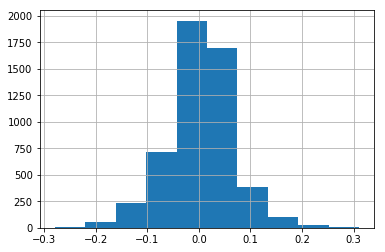

In [6]:
data.r20.hist()

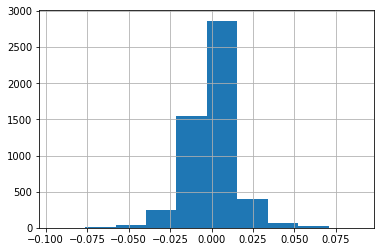

In [7]:
data.r1.hist()

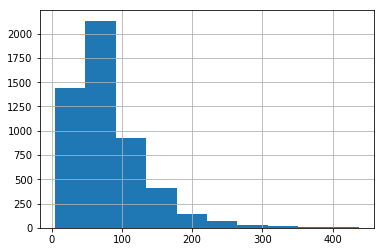

In [8]:
data.vol5.hist()

In [9]:

train_start = 0
train_end = train_start+4000
test_point = 1000
X_train = data.iloc[train_start:train_end, 7:-1]
# X_train = data.iloc[train_start:train_end, 8:]

y_train = reg_target['target'].iloc[train_start:train_end].values
X_test = data.iloc[train_end:train_end+test_point, 7:-1]

# X_test = data.iloc[train_end:train_end+test_point, 8:]
y_test = reg_target['target'].iloc[train_end:train_end+test_point].values

price_train = data.Close.iloc[train_start:train_end].values
price_test = data.Close.iloc[train_end:train_end+test_point].values

In [10]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

regr2 = RandomForestRegressor(n_estimators=50, max_depth=33)
regr2.fit(X_train, y_train)
print('train score : ', regr2.score(X_train, y_train))
print('test score : ', regr2.score(X_test, y_test))

train score :  0.8457834593604828
test score :  0.050974440343554805


In [11]:
pred_train = regr2.predict(X_train)
pred_test = regr2.predict(X_test)*n

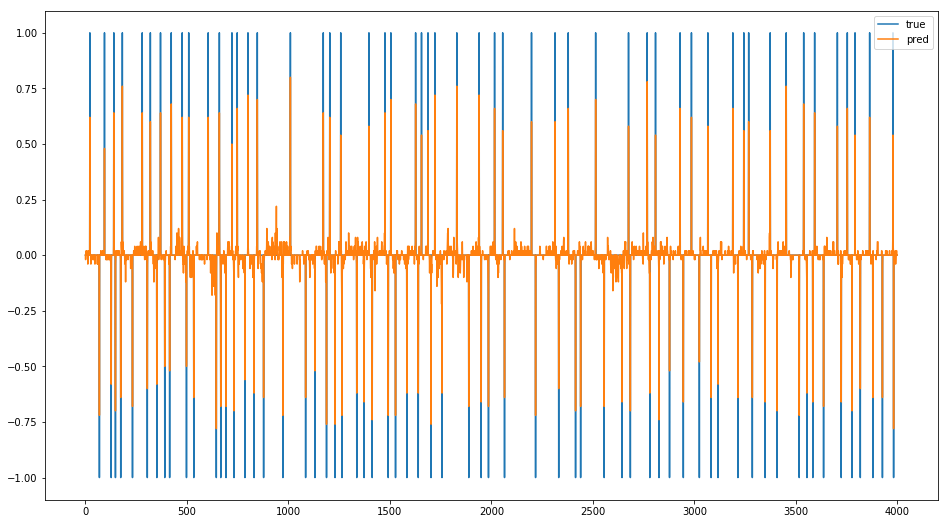

In [12]:
plt.figure(figsize=(16,9))
plt.plot(y_train, label='true')
plt.plot(pred_train, label='pred')
plt.legend()
plt.show()

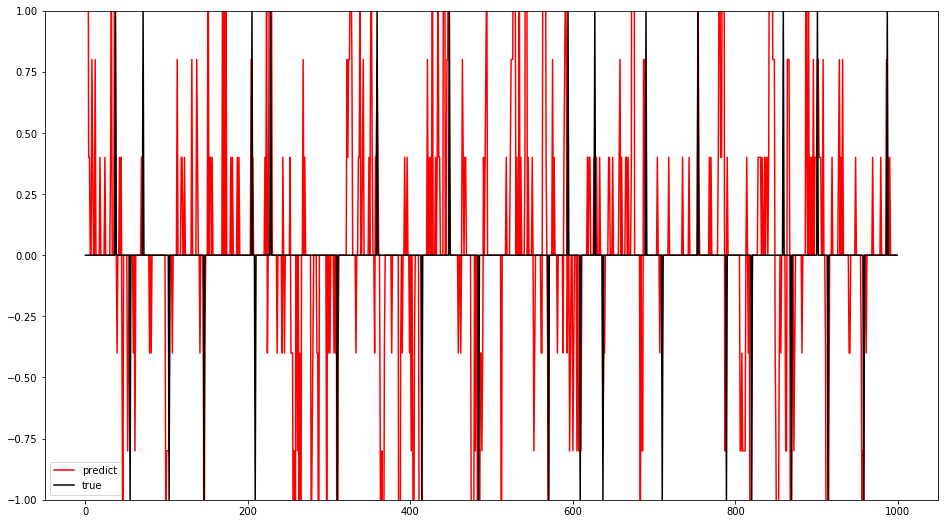

In [13]:
plt.figure(figsize=(16,9))
# plt.plot(y_test.values, label='true')
plt.plot(pred_test, label='predict', color='red')
plt.plot(y_test, label='true', color='black')
plt.ylim(-1, 1)
plt.legend()
plt.show()

In [14]:
# next job finding predict next return in n days is > or < +-5% 
# find prediction error 

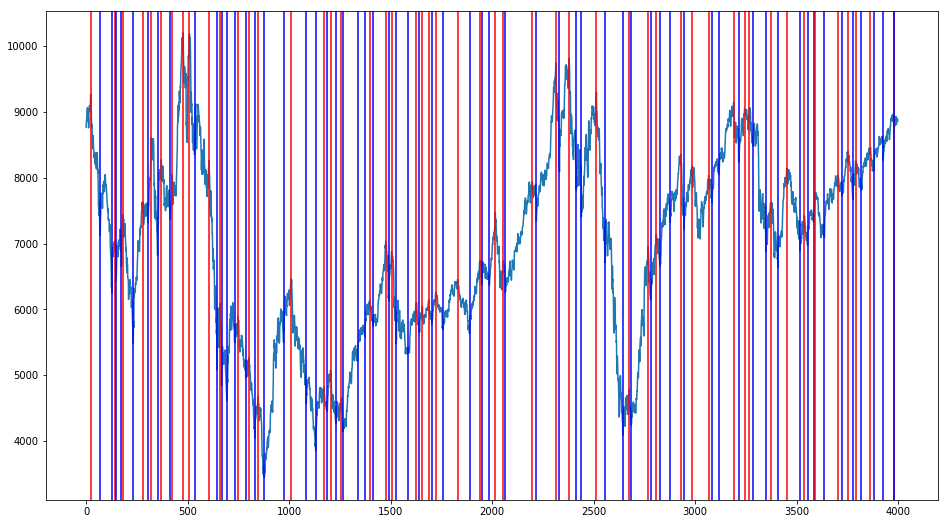

In [15]:
plt.figure(figsize=(16,9))
plt.plot(price_train)
for i in range(len(price_train)):
    if pred_train[i] > 0.5:
        plt.axvline(i, color='red')
    elif pred_train[i] < -0.5:
        plt.axvline(i, color='blue')

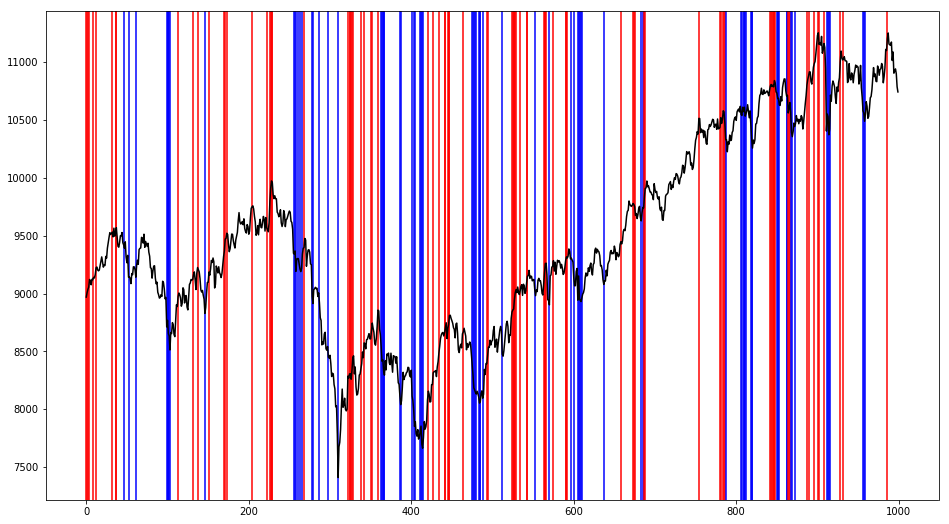

In [16]:
plt.figure(figsize=(16,9))
for i in range(len(price_test)):
    if pred_test[i] >= 0.5 : 
        plt.axvline(i, color='red')
    elif pred_test[i] <= -0.5 :
        plt.axvline(i, color='blue')
#     if y_test[i] > 0.5 : 
#         plt.axvline(i, color='black')
#     elif y_test[i] < -0.5 :
#         plt.axvline(i, color='black')    
plt.plot(price_test, color='black')
plt.show()

In [17]:
n= 5 # number of points to be checked before and after 
# Find local peaks
reg_target = pd.DataFrame()
reg_target['Date'] = data.Date
reg_target['Close'] = data.Close
reg_target['pct_top'] = data.Close.pct_change(n).rolling(n).max().shift(-n)
reg_target['pct_bot'] = data.Close.pct_change(n).rolling(n).min().shift(-n)
reg_target['pct_change'] = data.Close.pct_change(n).shift(-n) # next n day return 
reg_target['target'] = (reg_target['pct_bot'] <= -0.02).astype(int) | (reg_target['pct_top'] >= 0.02).astype(int) * -1 
# reg_target['target'] = (reg_target['pct_change'] <= -0.03).astype(int) | (reg_target['pct_change'] >= 0.03).astype(int) * -1 
reg_target = reg_target.dropna()
reg_target

,Date,Close,pct_top,pct_bot,pct_change,target
4,1998-03-11,9030.549805,0.033205,-0.008625,-0.008625,-1
5,1998-03-12,9056.370117,0.023493,-0.021748,-0.021748,-1
6,1998-03-13,9055.509766,0.020022,-0.021748,-0.016706,-1
7,1998-03-16,9065.299805,0.016666,-0.033944,-0.033944,1
8,1998-03-17,9045.549805,-0.008625,-0.033944,-0.026389,1
9,1998-03-18,8952.660156,0.009840,-0.033944,0.009840,1
10,1998-03-19,8859.410156,0.017468,-0.033944,0.017468,1
11,1998-03-20,8904.230469,0.021518,-0.033944,0.021518,-1
12,1998-03-23,8757.589844,0.037838,-0.026389,0.037838,-1
13,1998-03-24,8806.849609,0.037838,0.009840,0.032283,-1


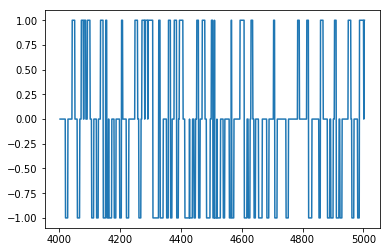

In [18]:
test_target = reg_target.iloc[train_end:train_end+test_point].target
plt.plot(test_target)

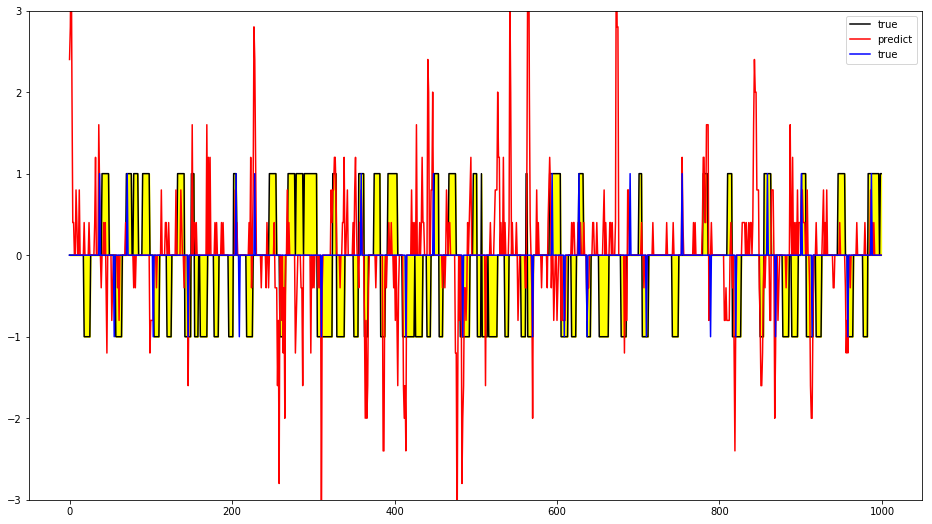

In [19]:
# plt.plot(reg_target.target)
plt.figure(figsize=(16,9))
# plt.plot(y_test.values, label='true')
x = np.arange(len(pred_test))
plt.plot(test_target.values, label='true', color='black')
plt.fill_between(x,0, test_target.values ,color='yellow')
plt.plot(pred_test, label='predict', color='red')
plt.plot(y_test, label='true', color='blue')
plt.ylim(-3,3)
plt.legend()
plt.show()

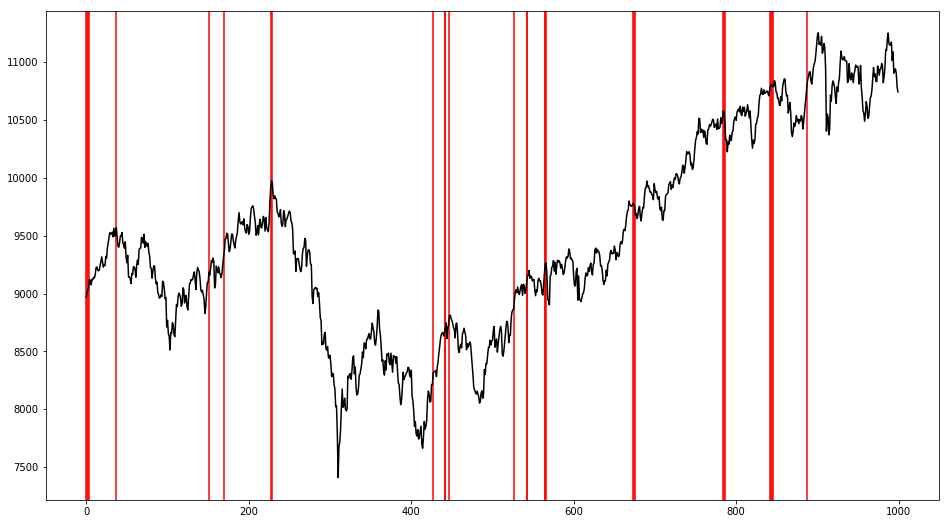

In [20]:
plt.figure(figsize=(16,9))
for i in range(len(price_test)):
    if pred_test[i] >= 1.5: 
        plt.axvline(i, color='red')
#     elif pred_test[i] < -1 :
#         plt.axvline(i, color='blue')
#     if y_test[i] > 0.5 : 
#         plt.axvline(i, color='black')
#     elif y_test[i] < -0.5 :
#         plt.axvline(i, color='black')    
plt.plot(price_test, color='black')
plt.show()

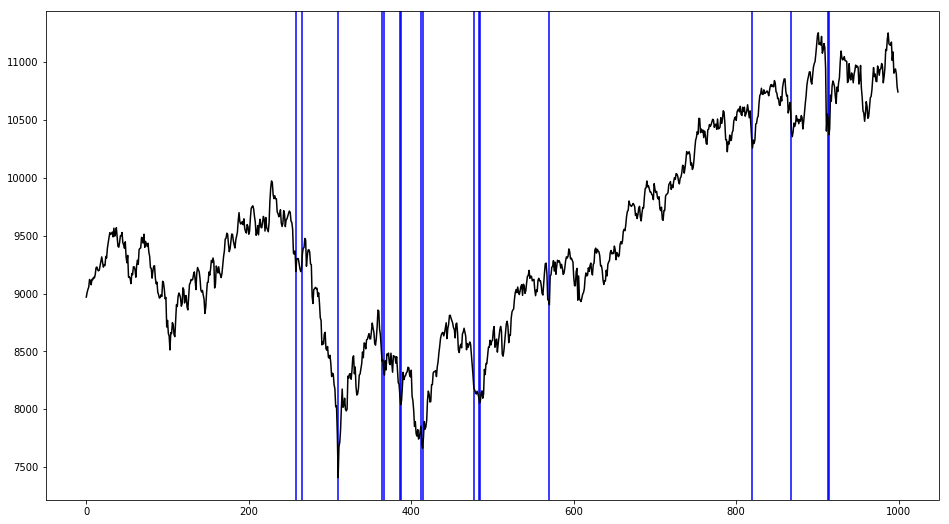

In [21]:
plt.figure(figsize=(16,9))
for i in range(len(price_test)):
#     if pred_test[i] > 0.75 : 
#         plt.axvline(i, color='red')
    if pred_test[i] <= -2:
        plt.axvline(i, color='blue')
#     if y_test[i] > 0.5 : 
#         plt.axvline(i, color='black')
#     elif y_test[i] < -0.5 :
#         plt.axvline(i, color='black')    
plt.plot(price_test, color='black')
plt.show()

In [22]:
# direction test 
in_bound = ((pred_test * test_target.values >= 0) & (test_target.values != 0 )).astype(int)
count_in_bound = np.sum(in_bound)
count_in_bound
print('direction accuracy :', count_in_bound/len(pred_test)*100, '%')

direction accuracy : 46.400000000000006 %


In [23]:
sum_corrected = 0 
sum_peak_bot = 0 
for i in range(len(y_test)):
    if (y_test[i] == 1 and pred_test[i] > 0.75) or (y_test[i] == -1 and pred_test[i] < -0.75) :
        sum_corrected += 1 
    if y_test[i] != 0 : 
        sum_peak_bot += 1 

In [24]:
from sklearn.externals import joblib
# regr2 = RandomForestRegressor(n_estimators=50, max_depth=33)
load_model = False 
if load_model : 
    regr2 = joblib.load('Weight/random_forest_TWII.pkl')

    print('train score : ', regr2.score(X_train, y_train))
    print('test score : ', regr2.score(X_test, y_test))

    pred_train = regr2.predict(X_train)
    pred_test = regr2.predict(X_test)*n

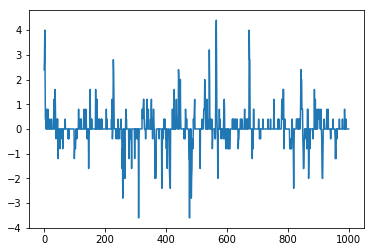

In [25]:
plt.plot(pred_test)

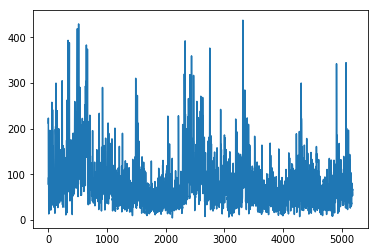

In [26]:
plt.plot(data.vol5)

In [27]:
action = 0 
ret = 1
bh = 1 
log_ret = [] 
log_bh = [] 
for i in range(5,len(price_test)):
    change = (price_test[i] - price_test[i-1])/price_test[i-1]
    vol = price_test[i-5:i].std()
    ret = ret * (1+change*action)
    bh = bh * (1+change)
    if pred_test[i] >= 1 and vol >= 100: 
        action = 0
    elif pred_test[i] <= -1  and vol >= 125:
        action = 1
    log_ret.append(ret)
    log_bh.append(bh)
print('model', ret, 'market', bh)

model 1.6242958448043663 market 1.177648704895054


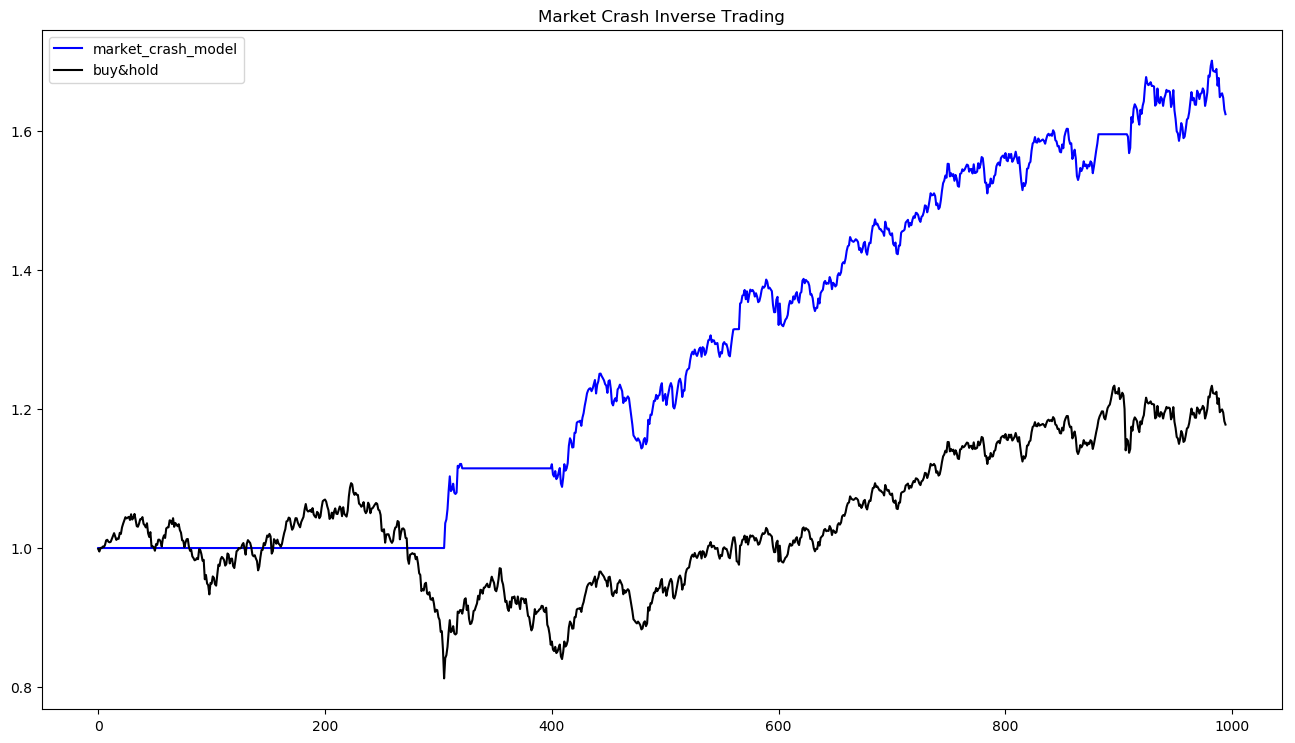

In [28]:
plt.figure(figsize=(16,9), dpi=100)
plt.title('Market Crash Inverse Trading')
plt.plot(log_ret, label='market_crash_model', color='blue')
plt.plot(log_bh, label='buy&hold', color='black')
plt.legend()
plt.show()

In [33]:
from sklearn.externals import joblib
save_model = True
if save_model : 
    joblib.dump(regr2, 'Weight/random_forest_TWII.pkl') 
    print('Save Done')

Save Done


In [30]:
action = 0 
ret = 1
bh = 1 
log_ret = [] 
log_bh = [] 
action_vol = 5 
vol_buy = 110
vol_sell = 80
rule_buy = -1
rule_sell = 1 
cost = 1 
move_trailing = 1.1 
stop_loss = 0.95
for i in range(action_vol, len(price_test)):
    change = (price_test[i] - price_test[i-1])/price_test[i-1]
    vol = price_test[i-action_vol:i].std()
    ret = ret * (1+change*action)
    bh = bh * (1+change)
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        action = 0
        cost = 0 
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        if action == 0 :
            cost = ret
        action = 1
        
    if action == 1 and ret >= cost * move_trailing:
        cost = ret  
    if ret <= cost * stop_loss :
        action = 0 
        cost = 0
        
    log_ret.append(ret)
    log_bh.append(bh)
print('model', ret, 'market', bh)

model 1.3292571204014891 market 1.177648704895054


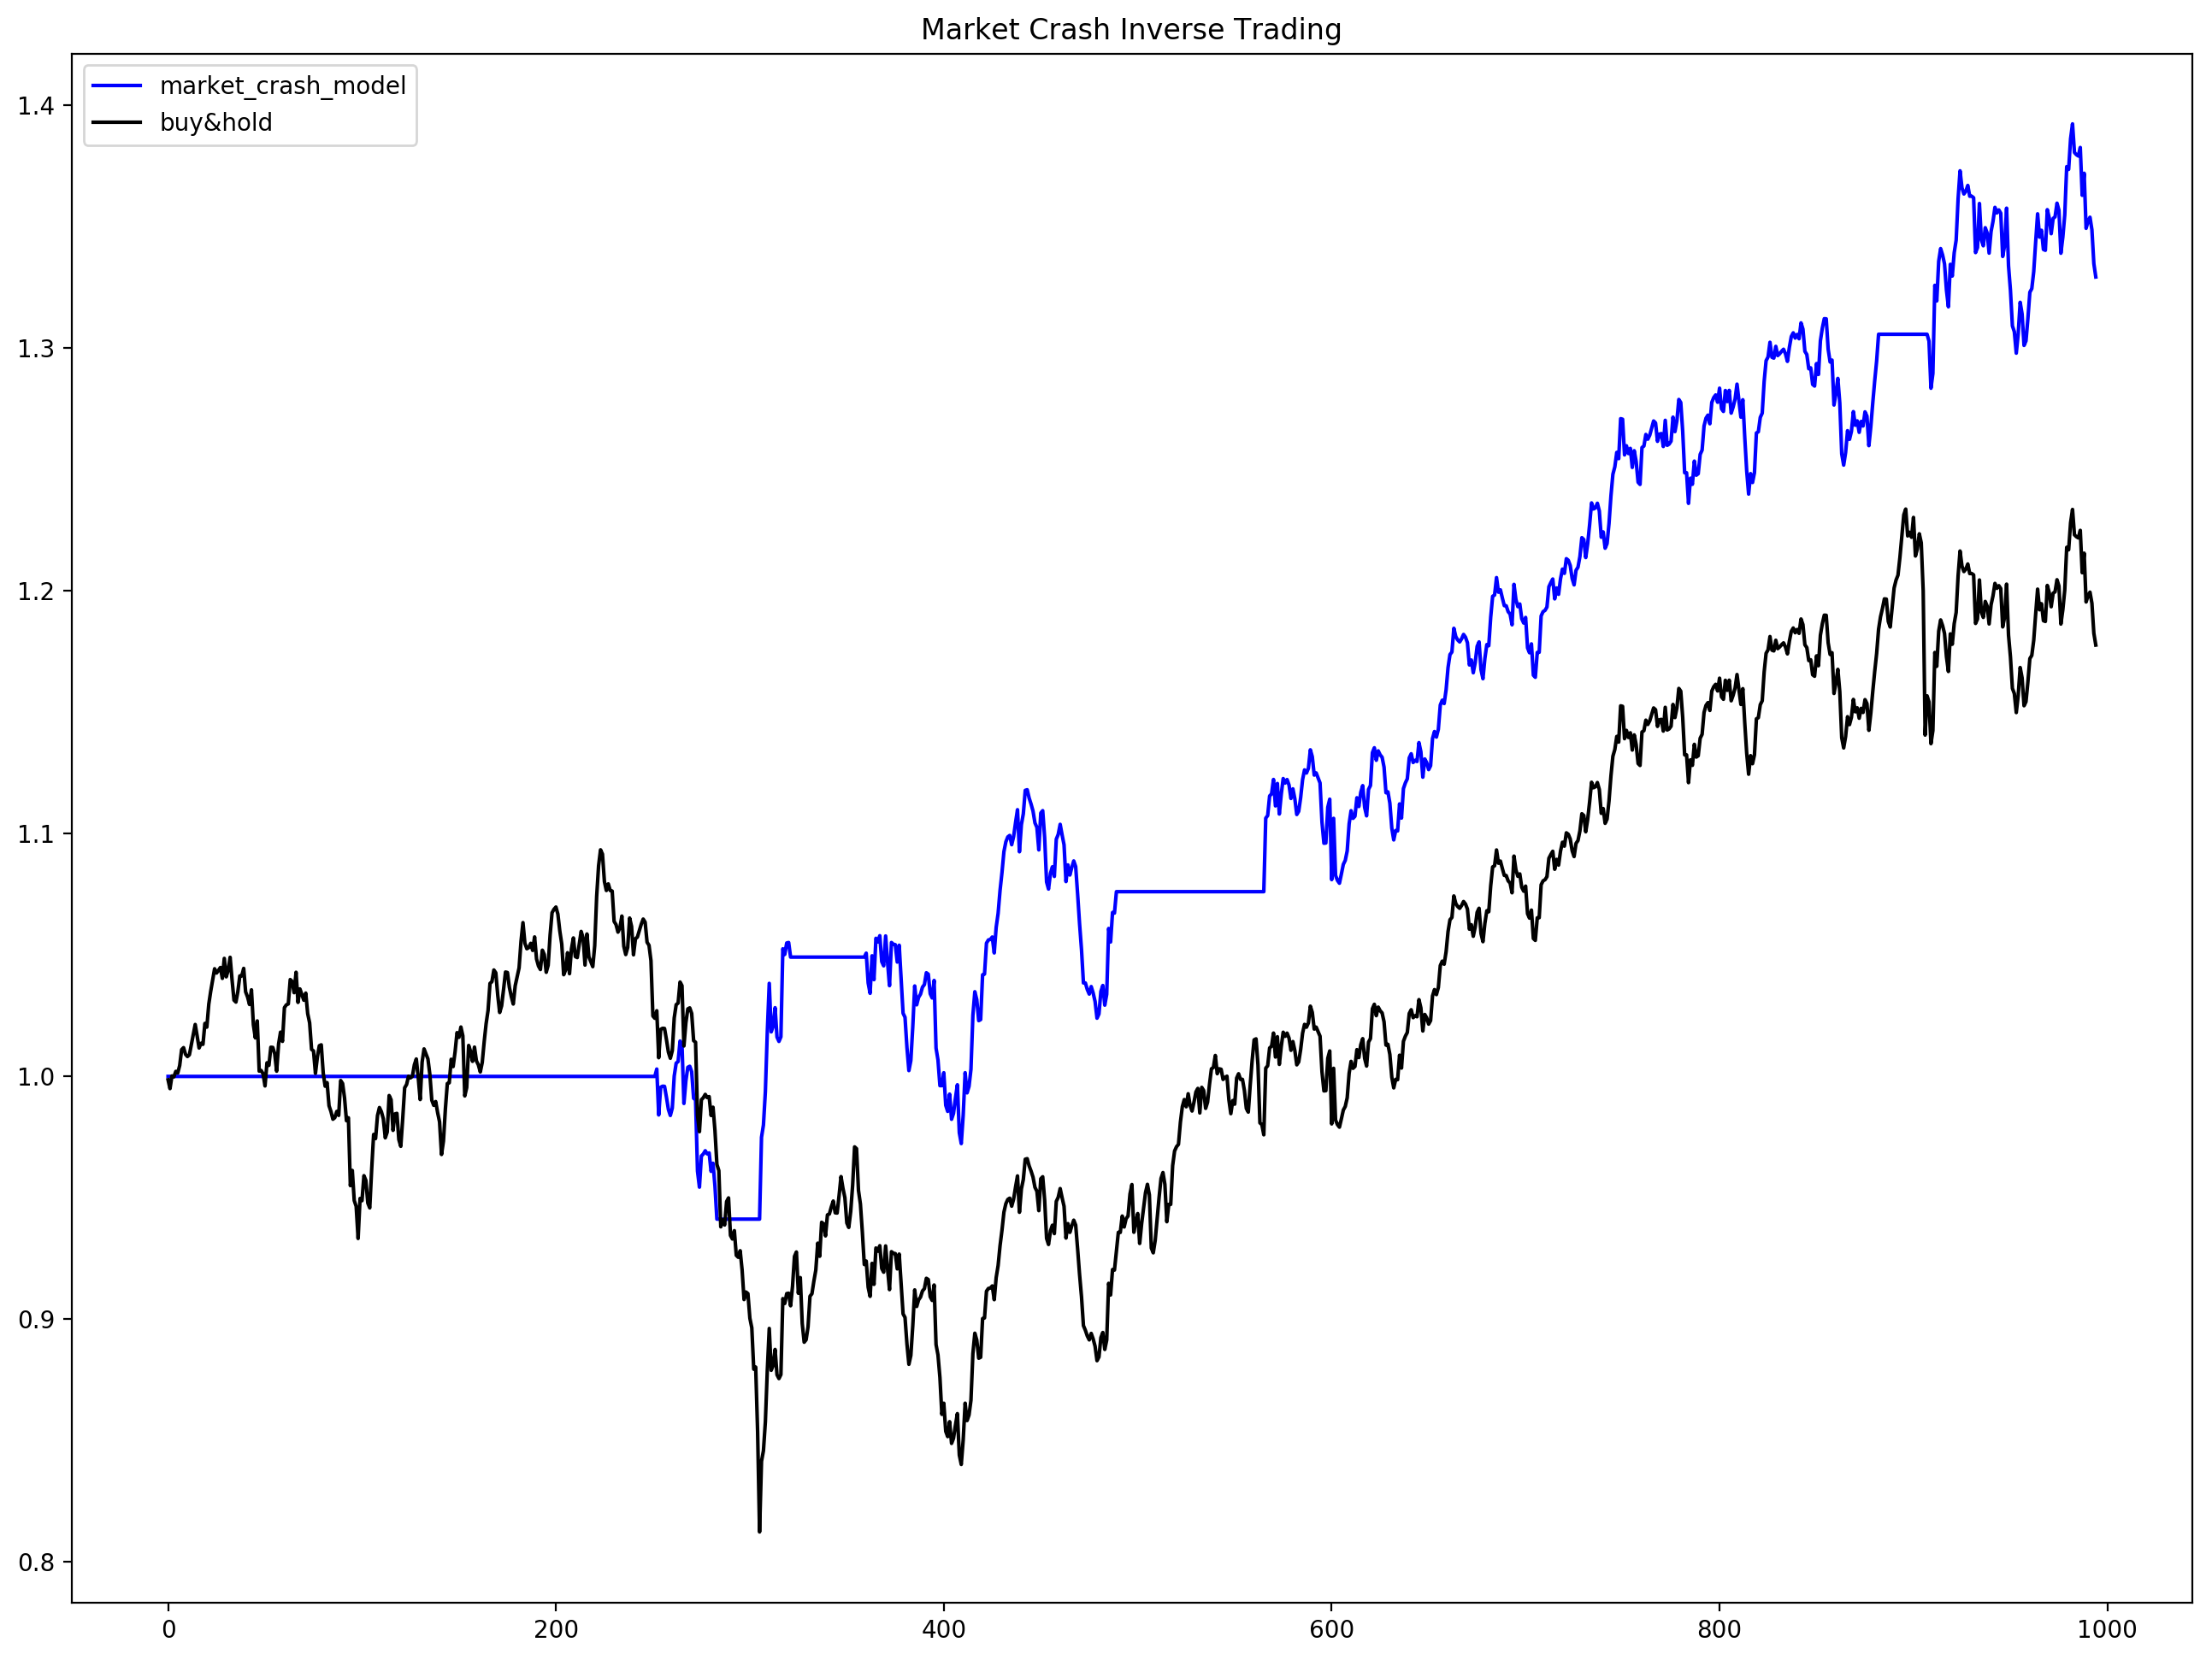

In [31]:
plt.figure(figsize=(16,12), dpi=200)
plt.title('Market Crash Inverse Trading')
plt.plot(log_ret, label='market_crash_model', color='blue')
plt.plot(log_bh, label='buy&hold', color='black')
plt.legend()
plt.savefig('TWII_ret.png')
plt.show()

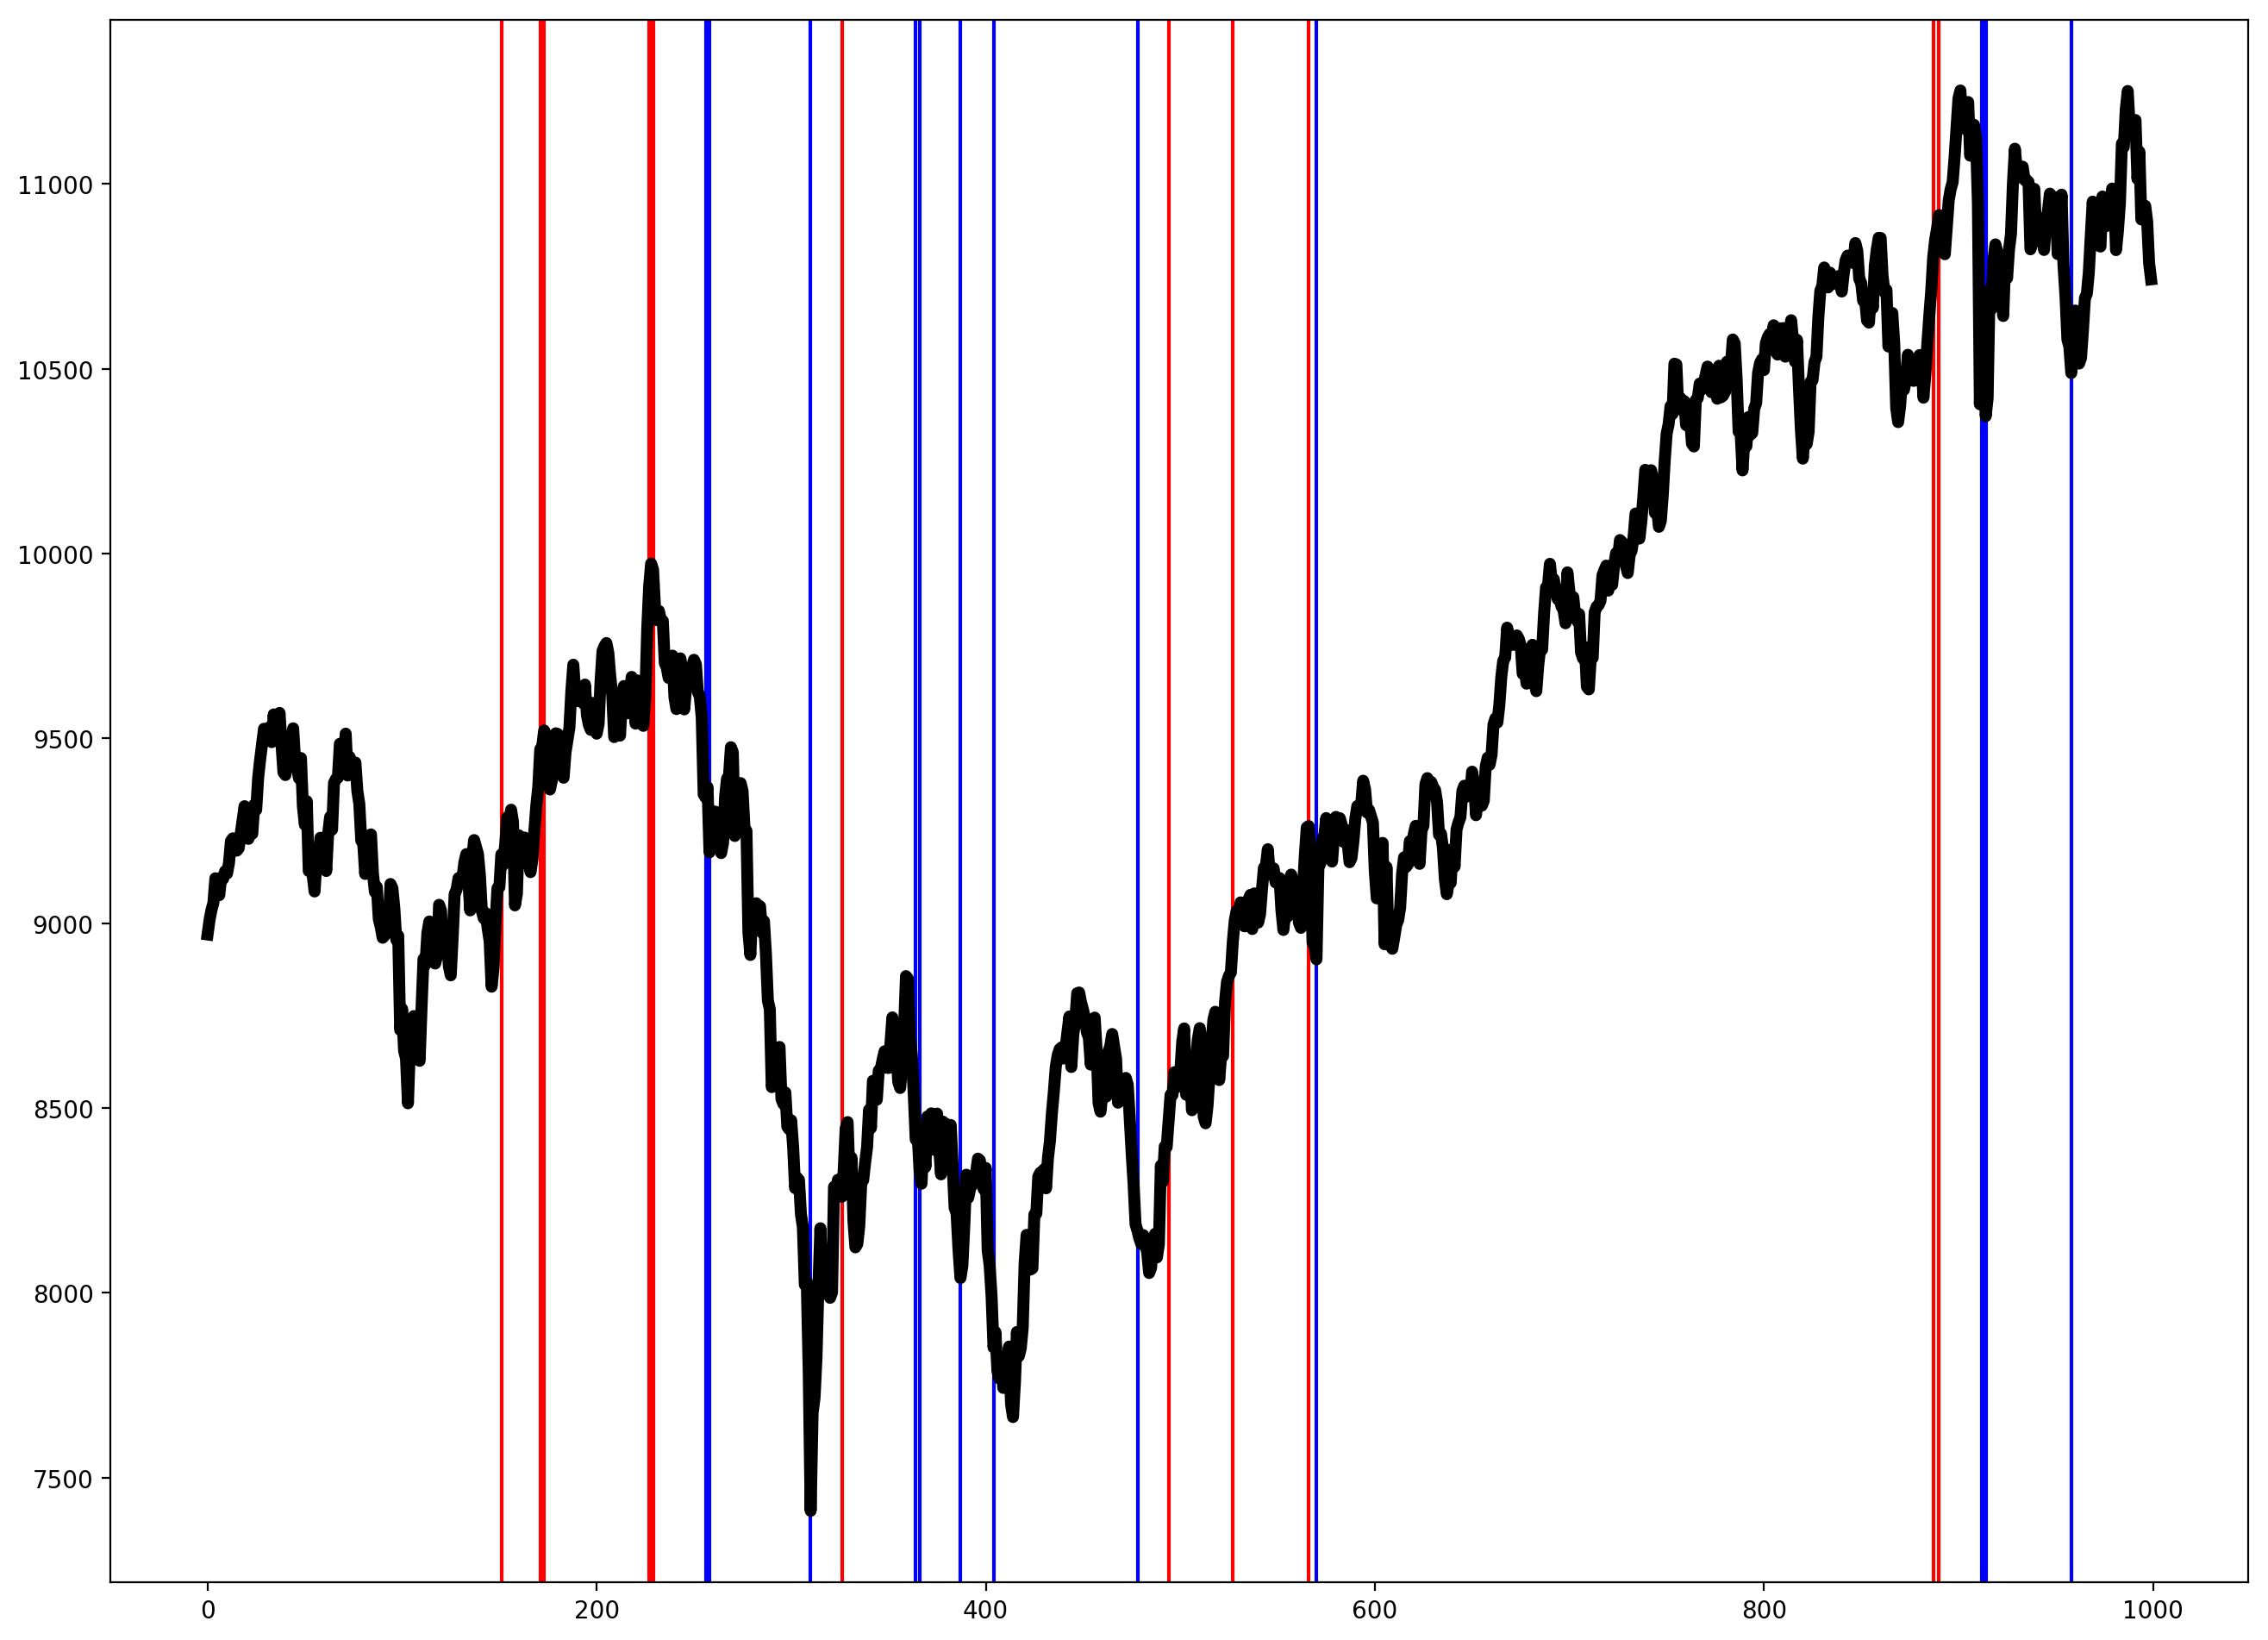

In [32]:
plt.figure(figsize=(16,12), dpi=200)
for i in range(action_vol, len(price_test)):
    vol = price_test[i-action_vol:i].std()
    if pred_test[i] >= rule_sell and vol >= vol_sell: 
        plt.axvline(i, color='red')
    elif pred_test[i] <= rule_buy  and vol >= vol_buy:
        plt.axvline(i, color='blue') 
plt.plot(price_test, color='black', linewidth=5)
plt.savefig('TWII_action.png')
plt.show()